<a href="https://colab.research.google.com/github/Radhika-0505/Image-recognition-using-VGG-16/blob/main/Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img
#Augmentation
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255] = 255
    hsv[:,:,2] = hsv[:,:,2]*value
    hsv[:,:,2][hsv[:,:,2]>255]= 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pathlib
import glob
directory=pathlib.Path("/content/drive/MyDrive/Indian actors ")
resultant="/content/augmentedimages"
items=os.listdir(directory)
classes=[]
count=0
images=[]
labels=[]
for i in items:
    i1=0
    print(i)
    classes.append(i)
    path1=f"{directory}/{i}"
    a=random.randint(5,10)
    img=cv2.imread(path1)
    img=cv2.resize(img,(224,224))
    k=i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
    i1+=1
    while a!=0:
      img=cv2.rotate(img,lt[random.randint(0,2)])
      images.append(img)
      cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
      i1+=1
      labels.append(count)
      if a%2==0:
        img = brightness(img)
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
        i1+=1
        labels.append(count)
      a-=1
    count+=1
images=np.array(images)
labels=np.array(labels)

Nani.jpg
Ram charan.jpg
Dhanush.jpg
Allu arjun.jpg
Pawan kalyan.jpg
Sushant singh.jpg
Varun.jpg
Ranveer Singh.jpg
Sharukh khan.jpg
Rajinikanth.jpg


In [3]:
images.shape

(101, 224, 224, 3)

In [4]:
from keras.layers import Dense,Dropout, Flatten
from tensorflow.keras.models import *
from keras.applications import ResNet50
#Using ResNet50 pretrained model
model=ResNet50(weights="imagenet",include_top=False,input_shape=(224,224,3))
for i in model.layers:
  i.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
len(model.layers)

175

In [6]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
from keras.layers import GlobalAveragePooling2D # Correct import statement for GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Dense

# Create a new Sequential model
transferresnet = Sequential()
#adding pretrained model
transferresnet.add(model)
#adding customer layers
transferresnet.add(GlobalAveragePooling2D())
transferresnet.add(Dense(512,activation="relu"))
transferresnet.add(Dense(128,activation="relu"))
transferresnet.add(Dense(25,activation="softmax"))

# Now you can build the model with the desired input shape
transferresnet.build(input_shape=(None, 224, 224, 3))

In [8]:
len(transferresnet.layers)

5

In [9]:
transferresnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,705,689 (94.24 MB)

 Trainable params: 1,117,977 (4.26 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    print("call")
    if(logs.get('accuracy')>.99):
      print("\nReached %2.2f%% accuracy, so stopping training"%(99))
      self.model.stop_training=True
callbacks=myCallback()


In [11]:
transferresnet.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferresnet.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1866 - loss: 3.1576call
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.2028 - loss: 3.0660
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6808 - loss: 1.0663call
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.6872 - loss: 1.0443
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9707 - loss: 0.1742call
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9667 - loss: 0.1794
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9664 - loss: 0.0945call
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9692 - loss: 0.0918
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 1.0000 - loss: 0.0292call

Reached 99.00% accuracy, so stopping training
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 1.0000 - loss: 0.0280


In [12]:
#Prediction function with labels
def predict(i,transferVGG,labels):
  path1=f"{directory}/{i}"
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  a=np.argmax(transferresnet.predict(np.array([img])))
  img=cv2.putText(img,labels[a],(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(225,225,0),3,cv2.LINE_AA)
  plt.imshow(img)

In [13]:
classes

['Nani.jpg',
 'Ram charan.jpg',
 'Dhanush.jpg',
 'Allu arjun.jpg',
 'Pawan kalyan.jpg',
 'Sushant singh.jpg',
 'Varun.jpg',
 'Ranveer Singh.jpg',
 'Sharukh khan.jpg',
 'Rajinikanth.jpg']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


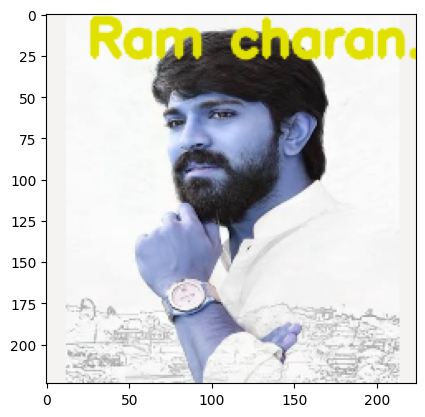

In [17]:
predict("Ram charan.jpg",transferresnet,classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


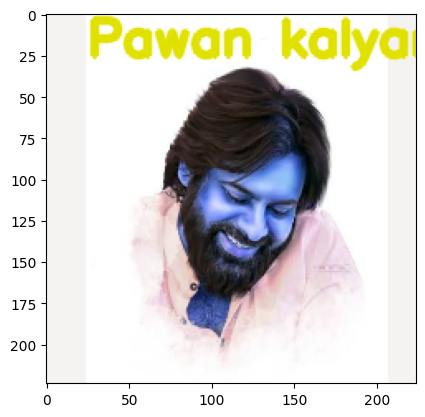

In [16]:
predict("Pawan kalyan.jpg",transferresnet,classes)